In [2]:
import numpy as np
np.random.seed(42)

import random
random.seed(42)

In [56]:
import pandas
import numpy as np

ratings_df = pandas.read_csv('ratings.csv')

userIDs = ratings_df['userId'].values
movies = ratings_df['movieId'].values
ratings = ratings_df['rating'].values



#Compute using dictionary of movies/userIDs
movies_dict = {}
user_dict = {}
for i in range(len(userIDs)):
    
    #Use movieID as key
    if (movies[i] not in movies_dict.keys()):
        movies_dict[movies[i]] = [(userIDs[i], ratings[i])]
    else:
        movies_dict[movies[i]].append((userIDs[i], ratings[i]))
        
    #Use userID as key
    if (userIDs[i] not in user_dict.keys()):
        user_dict[userIDs[i]] = [(movies[i], ratings[i])]
    else:
        user_dict[userIDs[i]].append((movies[i], ratings[i]))

num_ratings = 0
for movieID in movies_dict.keys():
    for item in movies_dict[movieID]:
        num_ratings += 1

sparsity_dict = num_ratings/(len(movies_dict.keys()) * len(user_dict.keys()))

#print("Sparsity is: {}".format(sparsity))
print("Sparsity (dict) is: {}".format(sparsity_dict))

Sparsity (dict) is: 0.016999683055613623


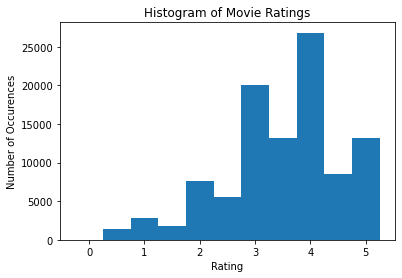

In [57]:
#Q2

import matplotlib.pyplot as plt

#Bars are centered around the ratings (0.5, 1, 1.5, etc.)
hist_bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]
plt.hist(ratings, bins=hist_bins)
plt.xlabel("Rating")
plt.title("Histogram of Movie Ratings")
plt.ylabel("Number of Occurences")
plt.show()

#Looks normally distributed, mean around 3.5-4. Most reviewed movies were enjoyed by the viewer
#Nobody gave a review of 0/5

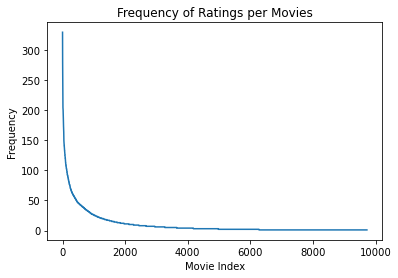

In [58]:
#Q3

freqs = []
for movie in movies_dict.keys():
    freqs.append(len(movies_dict[movie]))

freqs = np.sort(np.asarray(freqs))
movie_ind = np.flip(np.arange(freqs.shape[0]))
plt.plot(movie_ind,freqs)
plt.xlabel("Movie Index")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings per Movies")
plt.show()    

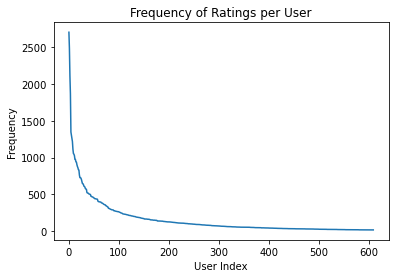

In [59]:
#Q4

freqs = []
for movie in user_dict.keys():
    freqs.append(len(user_dict[movie]))

freqs = np.sort(np.asarray(freqs))
movie_ind = np.flip(np.arange(freqs.shape[0]))
plt.plot(movie_ind,freqs)
plt.xlabel("User Index")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings per User")
plt.show()

Q5

Recommendations will be heavily weighted towards a few hundred movies, since those are the most reviewed ones. Most movies have less than 25 reviews, so our matrix will be sparse.

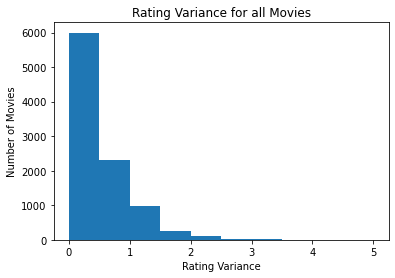

In [60]:
#Q6
#Variances are low for most movies (0-1). This suggests that most users seem to agree on which movies are good/bad
hist_bins = np.arange(0, 5.5, 0.5)
variances = []
for movie in movies_dict.keys():
    temp_vars = []
    for item in movies_dict[movie]:
        temp_vars.append(item[1])
    variances.append(np.var(np.asarray(temp_vars)))
    
plt.hist(variances, bins=hist_bins)
plt.xlabel("Rating Variance")
plt.title("Rating Variance for all Movies")
plt.ylabel("Number of Movies")
plt.show()        

Q7

$\mu_u = \frac{\sum_{k \in{I_u}}r_{uk}}{length(I_u)}$

Q8

$I_u \cap I_v$ represents the set of indices for the movies rated by both users u and v. This can be equal to $\emptyset$, meaning that they haven't seen any of the same movies. Given that our rating matrix is very sparse, this is likely to be the case if we were to randomly select any two users.

Q9

This mean-centering process helps reduce the influence of outliers, and reduce bias in our predictions. This would remove the effect of users that only give high/low ratings of movies, since the low variance of their rankings suggests that their opinions on movies are biased and may not be suitable for movie recommendations. 

Working with k = 10
Working with k = 20
Working with k = 30
Working with k = 40
Working with k = 50
Working with k = 60
Working with k = 70
Working with k = 80
Working with k = 90
Working with k = 100


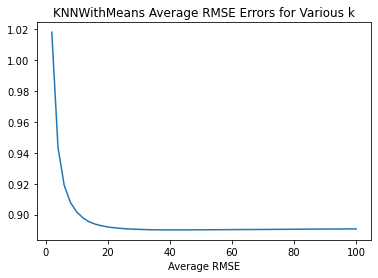

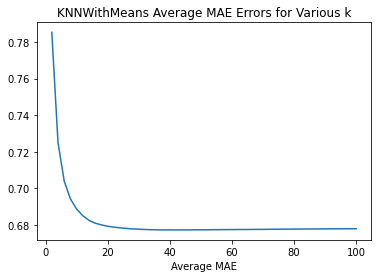

In [51]:
#Q10

from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.similarities import pearson
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise.model_selection import KFold

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)

sim_options = {'name': 'pearson',
               'user_based': True
               }

reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

rmse_vals = []
mae_vals = []
k_vals = np.arange(2, 102, 2)
num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

#Unnecessarilly large number of k values - could stop at 50 and get the same result
for k in k_vals:
    if (k % 10 == 0):
        print("Working with k = {}".format(k))
    curr_knn = KNNWithMeans(k, sim_options=sim_options, verbose=False)
    cv_result = cross_validate(curr_knn, ratings_df_sup, cv=kf, measures=['rmse', 'mae'])
    rmse_vals.append(np.average(cv_result['test_rmse']))
    mae_vals.append(np.average(cv_result['test_mae']))

plt.plot(k_vals, rmse_vals)
plt.title("KNNWithMeans Average RMSE Errors for Various k")
plt.xlabel("k")
plt.xlabel("Average RMSE")
plt.show()

plt.figure;
plt.plot(k_vals, mae_vals)
plt.title("KNNWithMeans Average MAE Errors for Various k")
plt.xlabel("k")
plt.xlabel("Average MAE")
plt.show()


In [71]:
#Q11

#We can see that our minimum k for both is around 24. The steady state averages for both are as follows:

rmse_min_k = 24
mae_min_k = 24
print("Steady state average RMSE error = {}".format(np.average(rmse_vals[rmse_min_k//2 - 1:])))
print("Steady state average MAE error = {}".format(np.average(mae_vals[mae_min_k//2 - 1:])))

Steady state average RMSE error = 0.8904004461863676
Steady state average MAE error = 0.6776436730833341


Working with k = 10
Working with k = 20
Working with k = 30
Working with k = 40
Working with k = 50
Working with k = 60
Working with k = 70
Working with k = 80
Working with k = 90
Working with k = 100


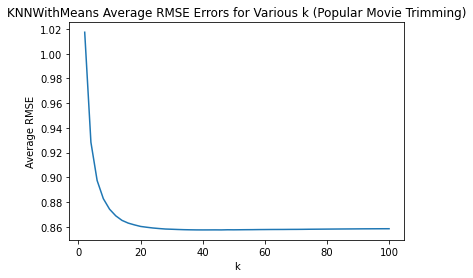

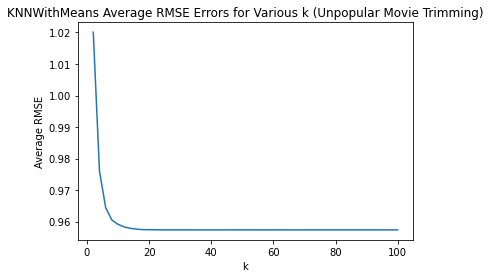

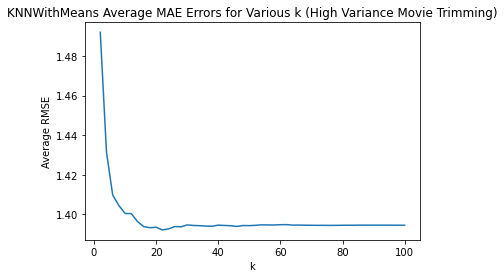

In [72]:
#Q12-14

from surprise import accuracy
from surprise.model_selection import KFold


def trim_pop(arr):
    
    elem_dict = {}
    ret_arr = []
    for elem in arr:
        
        #Use movieID as key
        if (elem[1] not in elem_dict.keys()):
            elem_dict[elem[1]] = [elem]
        else:
            elem_dict[elem[1]].append(elem)
    
    for movID in elem_dict.keys():
        if (len(elem_dict[movID]) > 2):
            for elem in elem_dict[movID]:
                ret_arr.append(elem)
    return ret_arr

def trim_unpop(arr):
    elem_dict = {}
    ret_arr = []
    for elem in arr:
        
        #Use movieID as key
        if (elem[1] not in elem_dict.keys()):
            elem_dict[elem[1]] = [elem]
        else:
            elem_dict[elem[1]].append(elem)
    
    for movID in elem_dict.keys():
        if (len(elem_dict[movID]) <= 2):
            for elem in elem_dict[movID]:
                ret_arr.append(elem)
    return ret_arr

def trim_var(arr):
    elem_dict = {}
    ret_arr = []
    for elem in arr:
        
        #Use movieID as key
        if (elem[1] not in elem_dict.keys()):
            elem_dict[elem[1]] = [elem]
        else:
            elem_dict[elem[1]].append(elem)
    
    for movID in elem_dict.keys():
        if (len(elem_dict[movID]) >= 5):
            rating_arr = []
            elem_arr = []
            for elem in elem_dict[movID]:
                rating_arr.append(elem[2])
                elem_arr.append(elem)
            if (np.var(np.asarray(rating_arr)) >= 2):
                ret_arr += elem_arr
                
    return ret_arr


num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

k_vals = np.arange(2, 102, 2)
rmse_vals_12 = []
rmse_vals_13 = []
rmse_vals_14 = []

for k in k_vals:
    
    if (k % 10 == 0):
        print("Working with k = {}".format(k))
        
    algo = KNNWithMeans(k, sim_options=sim_options, verbose=False)
    temp_rmse_12 = 0
    temp_rmse_13 = 0
    temp_rmse_14 = 0
    
    for trainset, testset in kf.split(ratings_df_sup):

        #fit training set
        algo.fit(trainset)
        
        
        #Q12
        predictions = algo.test(trim_pop(testset))
        temp_rmse_12 += accuracy.rmse(predictions, verbose=False)

        #Q13
        predictions = algo.test(trim_unpop(testset))
        temp_rmse_13 += accuracy.rmse(predictions, verbose=False)
        
        #Q14
        predictions = algo.test(trim_var(testset))
        temp_rmse_14 += accuracy.rmse(predictions, verbose=False)
    
    rmse_vals_12.append(temp_rmse_12/num_splits)
    rmse_vals_13.append(temp_rmse_13/num_splits)
    rmse_vals_14.append(temp_rmse_14/num_splits)


plt.plot(k_vals, rmse_vals_12)
plt.title("KNNWithMeans Average RMSE Errors for Various k (Popular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.plot(k_vals, rmse_vals_13)
plt.title("KNNWithMeans Average RMSE Errors for Various k (Unpopular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure;
plt.plot(k_vals, rmse_vals_14)
plt.title("KNNWithMeans Average MAE Errors for Various k (High Variance Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

In [73]:
#No steady-state minimum, just minimum 

print("Minimum RMSE error for Popular Trimming = {}".format(min(rmse_vals_12)))
print("Minimum RMSE error for Unpopular Trimming = {}".format(min(rmse_vals_13)))
print("Minimum RMSE error for High Variance Trimming = {}".format(min(rmse_vals_14)))


Minimum RMSE error for Popular Trimming = 0.85741287652931
Minimum RMSE error for Unpopular Trimming = 0.9573650771849047
Minimum RMSE error for High Variance Trimming = 1.3921913749899169


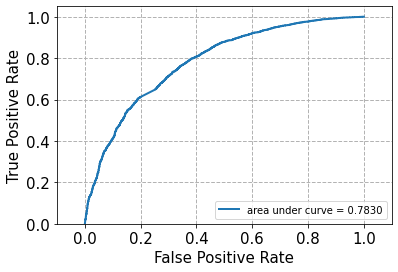

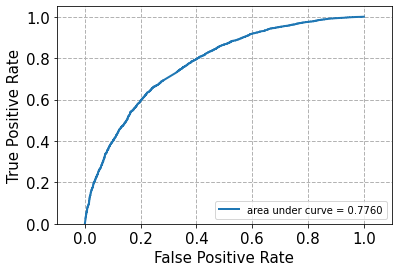

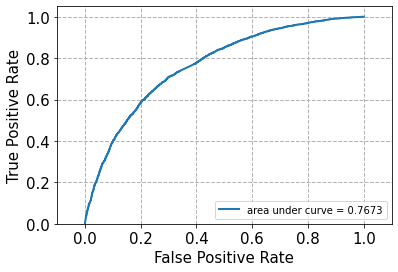

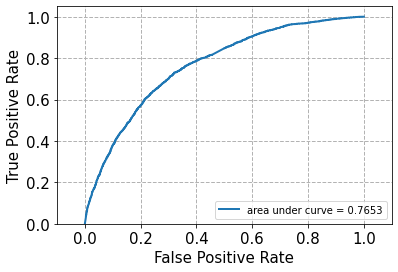

In [62]:
#Q15
from surprise.model_selection import train_test_split
from sklearn import metrics

def plot_roc(fpr, tpr):
    #helper function taken from discussion notebook
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

threshold_values = [2.5,3,3.5,4]

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for i in threshold_values:

    trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=42)
    
    curr_knn = KNNWithMeans(k=24, sim_options=sim_options, verbose=False)
    curr_knn.fit(trainset)
    predictions = curr_knn.test(testset)
    
    #Normalize predictions between 0 and 1?
    preds_list = [elem[3] for elem in predictions]
    
    #need 1D list to match preds_list
    true_list = []
    for j in range(len(testset)):
        elem = 0 if testset[j][2] <= i else 1
        true_list.append(elem)

     
    fpr, tpr, thresholds = metrics.roc_curve(true_list, preds_list)
    plot_roc(fpr,tpr)
    plt.text(0.0,0.9,"Threshold = {}".format(i),fontsize='large')

Q16

Just equation 5 but with the V removed from the minimization problem. This is already a least squares problem. Don't think it's a convex function, but not sure why.

Working with k = 4
Working with k = 8
Working with k = 12
Working with k = 16
Working with k = 20
Working with k = 24
Working with k = 28
Working with k = 32
Working with k = 36
Working with k = 40
Working with k = 44
Working with k = 48


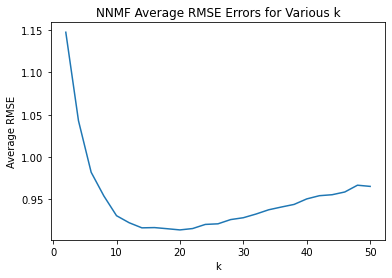

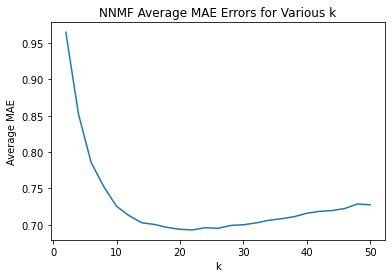

In [15]:
#Q17

from surprise.prediction_algorithms.matrix_factorization import NMF

rmse_vals = []
mae_vals = []
k_vals = np.arange(2, 52, 2)
num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for k in k_vals:
    if (k % 4 == 0):
        print("Working with k = {}".format(k))
    curr_nnmf = NMF(n_factors = k, random_state=42)
    cv_result = cross_validate(curr_nnmf, ratings_df_sup, cv=kf, measures=['rmse', 'mae'])
    rmse_vals.append(np.average(cv_result['test_rmse']))
    mae_vals.append(np.average(cv_result['test_mae']))

    

plt.plot(k_vals, rmse_vals)
plt.title("NNMF Average RMSE Errors for Various k")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, mae_vals)
plt.title("NNMF Average MAE Errors for Various k")
plt.xlabel("k")
plt.ylabel("Average MAE")
plt.show()


In [35]:
#Q18

#From README, there are 19 genre (including "(no genres listed)" being a genre). for RMSE and MAE k=18 ~= 19.
print("NNMF Minimum Average RMSE error = {}".format(min(rmse_vals)))
print("NNMF k for Mimimum Average RMSE error = {}".format((np.argmin(rmse_vals) + 1)*2))

print("NNMF Minimum Average MAE Error = {}".format(min(mae_vals)))
print("NNMF k for Minimum Average MAE error = {}".format((np.argmin(mae_vals) + 1)*2))     

NNMF Minimum Average RMSE error = 0.9136491904864747
NNMF k for Mimimum Average RMSE error = 20
NNMF Minimum Average MAE Error = 0.6930103162292347
NNMF k for Minimum Average MAE error = 22


Working with k = 4
Working with k = 8
Working with k = 12
Working with k = 16
Working with k = 20
Working with k = 24
Working with k = 28
Working with k = 32
Working with k = 36
Working with k = 40
Working with k = 44
Working with k = 48


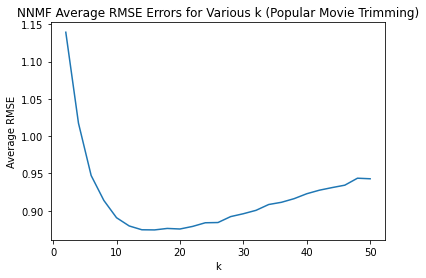

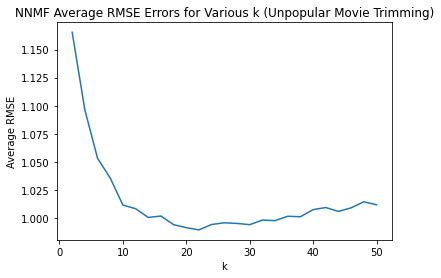

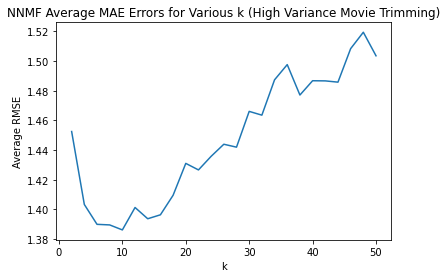

In [36]:
#Q19-21

from surprise import accuracy
from surprise.model_selection import KFold

num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

k_vals = np.arange(2, 52, 2)
rmse_vals_19 = []
rmse_vals_20 = []
rmse_vals_21 = []

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for k in k_vals:
    
    if (k % 4 == 0):
        print("Working with k = {}".format(k))
        
    algo = NMF(n_factors=k, random_state=42)
    temp_rmse_19 = 0
    temp_rmse_20 = 0
    temp_rmse_21 = 0
    
    for trainset, testset in kf.split(ratings_df_sup):

        #fit training set
        algo.fit(trainset)
        
        
        #Q19
        predictions = algo.test(trim_pop(testset))
        temp_rmse_19 += accuracy.rmse(predictions, verbose=False)

        #Q20
        predictions = algo.test(trim_unpop(testset))
        temp_rmse_20 += accuracy.rmse(predictions, verbose=False)
        
        #Q21
        predictions = algo.test(trim_var(testset))
        temp_rmse_21 += accuracy.rmse(predictions, verbose=False)
    
    rmse_vals_19.append(temp_rmse_19/num_splits)
    rmse_vals_20.append(temp_rmse_20/num_splits)
    rmse_vals_21.append(temp_rmse_21/num_splits)


plt.plot(k_vals, rmse_vals_19)
plt.title("NNMF Average RMSE Errors for Various k (Popular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, rmse_vals_20)
plt.title("NNMF Average RMSE Errors for Various k (Unpopular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, rmse_vals_21)
plt.title("NNMF Average MAE Errors for Various k (High Variance Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

In [37]:
#Q19-21
print("NNMF Minimum RMSE error for Popular Trimming = {}".format(min(rmse_vals_19)))
print("NNMF Minimum RMSE error for Unpopular Trimming = {}".format(min(rmse_vals_20)))
print("NNMF Minimum RMSE error for High Variance Trimming = {}".format(min(rmse_vals_21)))


NNMF Minimum RMSE error for Popular Trimming = 0.874217031110109
NNMF Minimum RMSE error for Unpopular Trimming = 0.989688193133825
NNMF Minimum RMSE error for High Variance Trimming = 1.3861614110162834


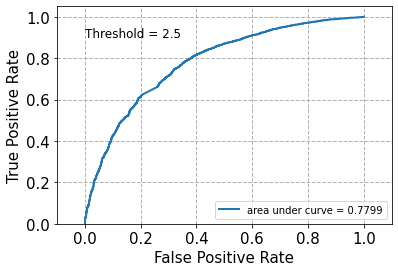

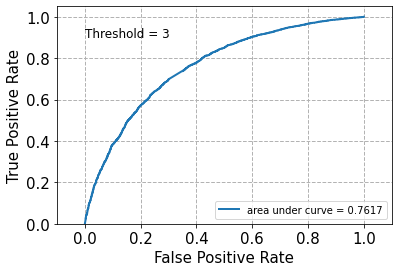

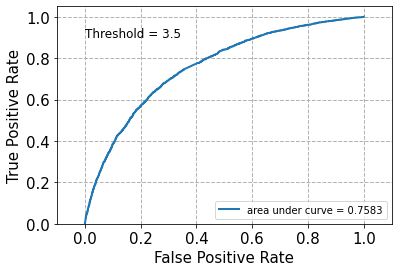

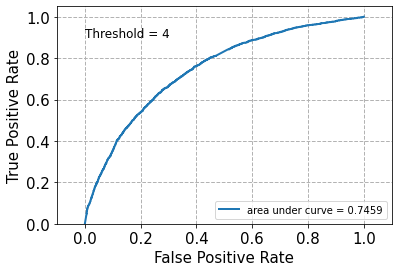

In [76]:
#Q22
#best k = 20 for RMSE and k = 22 for MAE. Pick one of the two
from surprise.model_selection import train_test_split
from sklearn import metrics

nnmf_best_k = 20
def plot_roc(fpr, tpr):
    #helper function taken from discussion notebook
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

threshold_values = [2.5,3,3.5,4]
ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for i in threshold_values:
    trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=42)
    
    curr_algo = NMF(n_factors=nnmf_best_k, random_state=42)
    curr_algo.fit(trainset)
    predictions = curr_algo.test(testset)
    
    preds_list = [elem[3] for elem in predictions]
    
    #need 1D list to match preds_list
    true_list = []
    for j in range(len(testset)):
        elem = 0 if testset[j][2] <= i else 1
        true_list.append(elem)

     
    fpr, tpr, thresholds = metrics.roc_curve(true_list, preds_list)
    plot_roc(fpr,tpr)
    plt.text(0.0,0.9,"Threshold = {}".format(i),fontsize='large')

In [68]:
#Q23

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

movies_df_pd = pandas.read_csv('movies.csv')
userIDs_mov = movies_df_pd['title'].values
movies_mov = movies_df_pd['movieId'].values
genres_mov = movies_df_pd['genres'].values

trainset = ratings_df_sup.build_full_trainset()
algo_23 = NMF(n_factors=20, random_state=42)
algo_23.fit(trainset)

#Might be flipped
U = algo_23.pu
V = algo_23.qi



Working with k = 4
Working with k = 8
Working with k = 12
Working with k = 16
Working with k = 20
Working with k = 24
Working with k = 28
Working with k = 32
Working with k = 36
Working with k = 40
Working with k = 44
Working with k = 48


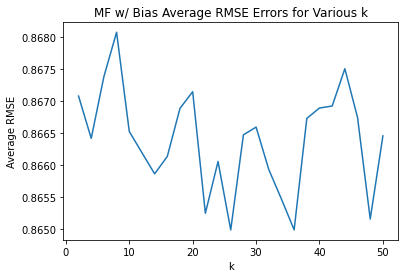

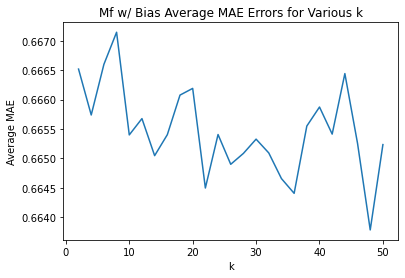

In [40]:
#Q24

from surprise.prediction_algorithms.matrix_factorization import SVD

#Use SVD
rmse_vals = []
mae_vals = []
k_vals = np.arange(2, 52, 2)
num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for k in k_vals:
    if (k % 4 == 0):
        print("Working with k = {}".format(k))
    curr_svd = SVD(n_factors = k, random_state=42)
    cv_result = cross_validate(curr_svd, ratings_df_sup, cv=kf, measures=['rmse', 'mae'])
    rmse_vals.append(np.average(cv_result['test_rmse']))
    mae_vals.append(np.average(cv_result['test_mae']))

    

plt.plot(k_vals, rmse_vals)
plt.title("MF w/ Bias Average RMSE Errors for Various k")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, mae_vals)
plt.title("Mf w/ Bias Average MAE Errors for Various k")
plt.xlabel("k")
plt.ylabel("Average MAE")
plt.show()

In [42]:
#Q25 

print("MF w/ Bias Minimum Average RMSE error = {}".format(min(rmse_vals)))
print("MF w/ Bias k for Mimimum Average RMSE error = {}".format((np.argmin(rmse_vals) + 1)*2))

print("MF w/ Bias Minimum Average MAE Error = {}".format(min(mae_vals)))
print("MF w/ Bias k for Minimum Average MAE error = {}".format((np.argmin(mae_vals) + 1)*2))    

MF w/ Bias Minimum Average RMSE error = 0.8649838750035588
MF w/ Bias k for Mimimum Average RMSE error = 26
MF w/ Bias Minimum Average MAE Error = 0.6637868460463568
MF w/ Bias k for Minimum Average MAE error = 48


Working with k = 4
Working with k = 8
Working with k = 12
Working with k = 16
Working with k = 20
Working with k = 24
Working with k = 28
Working with k = 32
Working with k = 36
Working with k = 40
Working with k = 44
Working with k = 48


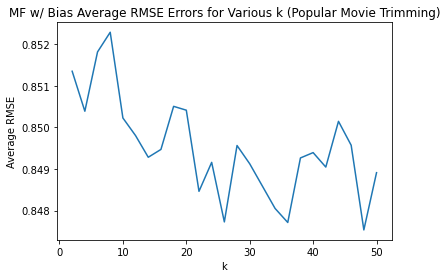

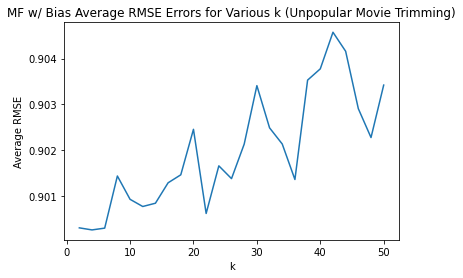

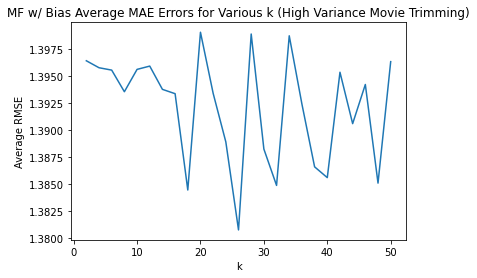

In [46]:
#Q26-28

from surprise import accuracy
from surprise.model_selection import KFold

num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

k_vals = np.arange(2, 52, 2)
rmse_vals_26 = []
rmse_vals_27 = []
rmse_vals_28 = []

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for k in k_vals:
    
    if (k % 4 == 0):
        print("Working with k = {}".format(k))
        
    algo = SVD(n_factors=k, random_state=42)
    temp_rmse_26 = 0
    temp_rmse_27 = 0
    temp_rmse_28 = 0
    
    for trainset, testset in kf.split(ratings_df_sup):

        #fit training set
        algo.fit(trainset)
        
        
        #Q26
        predictions = algo.test(trim_pop(testset))
        temp_rmse_26 += accuracy.rmse(predictions, verbose=False)

        #Q27
        predictions = algo.test(trim_unpop(testset))
        temp_rmse_27 += accuracy.rmse(predictions, verbose=False)
        
        #Q28
        predictions = algo.test(trim_var(testset))
        temp_rmse_28 += accuracy.rmse(predictions, verbose=False)
    
    rmse_vals_26.append(temp_rmse_26/num_splits)
    rmse_vals_27.append(temp_rmse_27/num_splits)
    rmse_vals_28.append(temp_rmse_28/num_splits)


plt.plot(k_vals, rmse_vals_26)
plt.title("MF w/ Bias Average RMSE Errors for Various k (Popular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, rmse_vals_27)
plt.title("MF w/ Bias Average RMSE Errors for Various k (Unpopular Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

plt.figure()
plt.plot(k_vals, rmse_vals_28)
plt.title("MF w/ Bias Average MAE Errors for Various k (High Variance Movie Trimming)")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

In [48]:
#Q26-28

print("MF w/ Bias Minimum RMSE error for Popular Trimming = {}".format(min(rmse_vals_26)))
print("MF w/ Bias Minimum RMSE error for Unpopular Trimming = {}".format(min(rmse_vals_27)))
print("MF w/ Bias Minimum RMSE error for High Variance Trimming = {}".format(min(rmse_vals_28)))

MF w/ Bias Minimum RMSE error for Popular Trimming = 0.847535921988365
MF w/ Bias Minimum RMSE error for Unpopular Trimming = 0.9002694561842809
MF w/ Bias Minimum RMSE error for High Variance Trimming = 1.3807616921288093


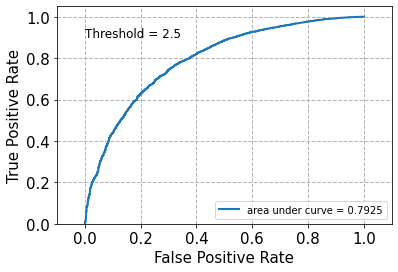

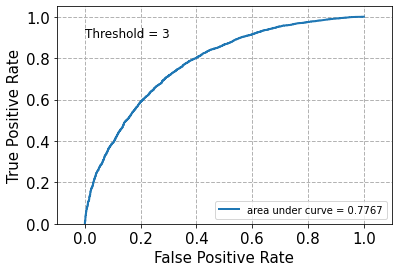

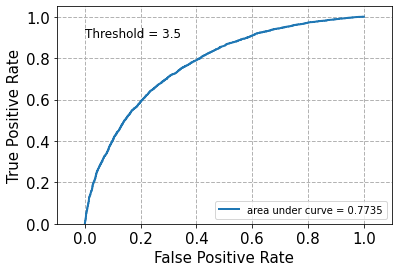

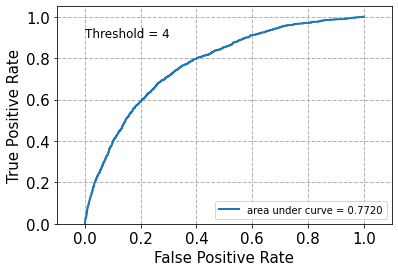

In [74]:
#Q29

#best k = 26 for RMSE and k = 42 for MAE. Although it doesn't really matter since the fluctuations are so low
from surprise.model_selection import train_test_split
from sklearn import metrics

mf_bias_best_k = 26
def plot_roc(fpr, tpr):
    #helper function taken from discussion notebook
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

threshold_values = [2.5,3,3.5,4]
ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

for i in threshold_values:
    trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=42)
    
    curr_algo = SVD(n_factors=mf_bias_best_k, random_state=42)
    curr_algo.fit(trainset)
    predictions = curr_algo.test(testset)
    
    preds_list = [elem[3] for elem in predictions]
    
    #need 1D list to match preds_list
    true_list = []
    for j in range(len(testset)):
        elem = 0 if testset[j][2] <= i else 1
        true_list.append(elem)

     
    fpr, tpr, thresholds = metrics.roc_curve(true_list, preds_list)
    plot_roc(fpr,tpr)
    plt.text(0.0,0.9,"Threshold = {}".format(i),fontsize='large')

In [71]:
#Q30-33

from sklearn.metrics import mean_squared_error

num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

def naive_predict(test_data):
    return [ui_dict[elem[0]] for elem in test_data]

def get_true_labels(test_data):
    return [elem[2] for elem in test_data]
    
    

#Make uis, using the dictionary from Q1. This uses all data in the set
ui_dict = {}

for user in user_dict.keys():
    ui_dict[user] = np.mean([elem[1] for elem in user_dict[user]])
        
ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

rmse_30 = 0
rmse_31 = 0
rmse_32 = 0
rmse_33 = 0

for trainset, testset in kf.split(ratings_df_sup):

    #Q30
    predictions = naive_predict(testset)
    true_labels = get_true_labels(testset)
    rmse_30 += mean_squared_error(true_labels, predictions, squared=False)
    
    #Q31
    predictions = naive_predict(trim_pop(testset))
    true_labels = get_true_labels(trim_pop(testset))
    rmse_31 += mean_squared_error(true_labels, predictions, squared=False)

    #Q32
    predictions = naive_predict(trim_unpop(testset))
    true_labels = get_true_labels(trim_unpop(testset))
    rmse_32 += mean_squared_error(true_labels, predictions, squared=False)

    #Q33
    predictions = naive_predict(trim_var(testset))
    true_labels = get_true_labels(trim_var(testset))
    rmse_33 += mean_squared_error(true_labels, predictions, squared=False)

rmse_30 /= num_splits
rmse_31 /= num_splits
rmse_32 /= num_splits
rmse_33 /= num_splits

print("Naive collaborative filter Average RMSE error = {}".format(rmse_30))
print("Naive collaborative filter Average RMSE error for Popular Trimming = {}".format(rmse_31))
print("Naive collaborative filter Average RMSE error for Unpopular Trimming = {}".format(rmse_32))
print("Naive collaborative filter Average RMSE error for High Variance Trimming = {}".format(rmse_33))

MF w/ Bias Average RMSE error = 0.9346786847813551
MF w/ Bias Average RMSE error for Popular Trimming = 0.9257778925102235
MF w/ Bias Average RMSE error for Unpopular Trimming = 0.9536376923419587
MF w/ Bias Average RMSE error for High Variance Trimming = 1.4077364624825506


In [ ]:
#Q34

ratings_df_pd = pandas.read_csv('ratings.csv')
ratings_df_sup = ratings_df_pd.drop(labels='timestamp', axis=1)
reader_df_pd = Reader(skip_lines=1, rating_scale=(0.5, 5))
ratings_df_sup = Dataset.load_from_df(ratings_df_sup, reader_df_pd)

#Get data for K-NN
trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=0)
    
curr_knn = KNNWithMeans(k=24, sim_options=sim_options, verbose=False)
curr_knn.fit(trainset)
predictions = curr_knn.test(testset)
    
#Normalize predictions between 0 and 1?
preds_list = [elem[3]/5 for elem in predictions]
    
#need 1D list to match preds_list
true_list = []
for j in range(len(testset)):
    elem = 0 if testset[j][2] <= 3 else 1
    true_list.append(elem)

     
fpr1, tpr1, thresholds1 = metrics.roc_curve(true_list, preds_list)
roc_auc1 = metrics.auc(fpr1,tpr1)

#Get data for NNMF
trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=0)

curr_algo = NMF(n_factors=nnmf_best_k, random_state=0)
curr_algo.fit(trainset)
predictions = curr_algo.test(testset)

#Normalize predictions between 0 and 1?
preds_list = [elem[3]/5 for elem in predictions]

#need 1D list to match preds_list
true_list = []
for j in range(len(testset)):
    elem = 0 if testset[j][2] <= 3 else 1
    true_list.append(elem)

 
fpr2, tpr2, thresholds2 = metrics.roc_curve(true_list, preds_list)
roc_auc2 = metrics.auc(fpr2,tpr2)

#Get data for MF w/ bias
trainset, testset = train_test_split(ratings_df_sup, test_size=.1, random_state=0)

curr_algo = SVD(n_factors=mf_bias_best_k, random_state=0)
curr_algo.fit(trainset)
predictions = curr_algo.test(testset)

#Normalize predictions between 0 and 1?
preds_list = [elem[3]/5 for elem in predictions]

#need 1D list to match preds_list
true_list = []
for j in range(len(testset)):
    elem = 0 if testset[j][2] <= 3 else 1
    true_list.append(elem)

 
fpr3, tpr3, thresholds3 = metrics.roc_curve(true_list, preds_list)

roc_auc3 = metrics.auc(fpr3,tpr3)

#Plot
fig, ax = plt.subplots()

ax.plot(fpr1, tpr1, lw=2, label= 'K-NN area under curve = %0.4f' % roc_auc1)
ax.plot(fpr2, tpr2, lw=2, label= 'NNMF area under curve = %0.4f' % roc_auc2)
ax.plot(fpr3, tpr3, lw=2, label= 'MFw/Bias area under curve = %0.4f' % roc_auc3)

ax.grid(color='0.7', linestyle='--', linewidth=1)

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)

ax.legend(loc="lower right")

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

In [ ]:
#Q36

#pre-processing function
#drop all users that didn't like any movies (didn't give rating >3)
#drop all users that rated < t movies 
def trim_ratings(arr,t):    
    elem_dict = {}
    ret_arr = []
    for elem in arr:
        
        #Use userID as key
        if (elem[0] not in elem_dict.keys()):
            elem_dict[elem[0]] = [elem]
        else:
            elem_dict[elem[0]].append(elem)
    
    for usID in elem_dict.keys():
        if (len(elem_dict[usID]) > t) and any(elem_dict[usID][j][2]>3 for j in range(len(elem_dict[usID]))):
            for elem in elem_dict[usID]:
                ret_arr.append(elem)
    return ret_arr


from collections import defaultdict
#this function was sourced from the Surprise documentation!
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

#10-fold cross validation - will average recall and precision
num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

algo = KNNWithMeans(24, sim_options=sim_options, verbose=False)

t_precs_KNN = []
t_recs_KNN = []
t_vals = range(1,26)

for t in t_vals:
    print("working on t = ", t)
    for trainset, testset in kf.split(ratings_df_sup):
        precs_fold = []
        recs_fold = []
        
        algo.fit(trainset)

        predictions = algo.test(trim_ratings(testset,t))
        precs, recs = precision_recall_at_k(predictions, t, 3)
        
        avg_prec = sum(precs.values())/len(precs)
        avg_rec = sum(recs.values())/len(recs)
        precs_fold.append(avg_prec)
        recs_fold.append(avg_rec)
    
    avg_prec_t = sum(precs_fold)/num_splits
    avg_rec_t = sum(recs_fold)/num_splits
    t_precs_KNN.append(avg_prec_t)
    t_recs_KNN.append(avg_rec_t)
    
plt.figure()
plt.plot(t_vals, t_precs_KNN)
plt.title("Average Precision vs. t for k-NN")
plt.xlabel("t")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_vals, t_recs_KNN)
plt.title("Average Recall vs. t for k-NN")
plt.xlabel("t")
plt.ylabel("Recall")
plt.show()



In [ ]:
#Q37
#10-fold cross validation - will average recall and precision

num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

algo = NMF(n_factors = 20, random_state=42)

t_precs_NNMF = []
t_recs_NNMF = []

for t in t_vals:
    print("working on t = ", t)
    for trainset, testset in kf.split(ratings_df_sup):
        precs_fold = []
        recs_fold = []
        
        algo.fit(trainset)

        predictions = algo.test(trim_ratings(testset,t))
        precs, recs = precision_recall_at_k(predictions, t, 3)
        
        avg_prec = sum(precs.values())/len(precs)
        avg_rec = sum(recs.values())/len(recs)
        precs_fold.append(avg_prec)
        recs_fold.append(avg_rec)
    
    avg_prec_t = sum(precs_fold)/num_splits
    avg_rec_t = sum(recs_fold)/num_splits
    t_precs_NNMF.append(avg_prec_t)
    t_recs_NNMF.append(avg_rec_t)
    
plt.figure()
plt.plot(t_vals, t_precs_NNMF)
plt.title("Average Precision vs. t for NNMF")
plt.xlabel("t")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_vals, t_recs_NNMF)
plt.title("Average Recall vs. t for NNMF")
plt.xlabel("t")
plt.ylabel("Recall")
plt.show()



In [ ]:
#Q38 
#10-fold cross validation - will average recall and precision

num_splits = 10
kf = KFold(n_splits=num_splits, random_state=42)

algo = SVD(n_factors=26, random_state=42)

t_precs_MF = []
t_recs_MF = []

for t in t_vals:
    print("working on t = ", t)
    for trainset, testset in kf.split(ratings_df_sup):
        precs_fold = []
        recs_fold = []
        
        algo.fit(trainset)

        predictions = algo.test(trim_ratings(testset,t))
        precs, recs = precision_recall_at_k(predictions, t, 3)
        
        avg_prec = sum(precs.values())/len(precs)
        avg_rec = sum(recs.values())/len(recs)
        precs_fold.append(avg_prec)
        recs_fold.append(avg_rec)
    
    avg_prec_t = sum(precs_fold)/num_splits
    avg_rec_t = sum(recs_fold)/num_splits
    t_precs_MF.append(avg_prec_t)
    t_recs_MF.append(avg_rec_t)
    
plt.figure()
plt.plot(t_vals, t_precs_MF)
plt.title("Average Precision vs. t for MF")
plt.xlabel("t")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_vals, t_recs_MF)
plt.title("Average Recall vs. t for MF")
plt.xlabel("t")
plt.ylabel("Recall")
plt.show()



In [ ]:
#Q 39 and individual recall/precision plots for 36-38
#fixing sorting so that recs are strictly increasing
t_recs_KNN, t_precs_KNN = zip(*sorted(zip(t_recs_KNN, t_precs_KNN)))
t_recs_NNMF, t_precs_NNMF = zip(*sorted(zip(t_recs_NNMF, t_precs_NNMF)))
t_recs_MF, t_precs_MF = zip(*sorted(zip(t_recs_MF, t_precs_MF)))

plt.figure()
plt.plot(t_recs_KNN, t_precs_KNN)
plt.title("Average Precision vs Average Recall for k-NN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_recs_NNMF, t_precs_NNMF)
plt.title("Average Precision vs Average Recall for NNMF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_recs_MF, t_precs_MF)
plt.title("Average Precision vs Average Recall for MF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

plt.figure()
plt.plot(t_recs_MF, t_precs_MF)
plt.plot(t_recs_NNMF, t_precs_NNMF)
plt.plot(t_recs_KNN, t_precs_KNN)
plt.legend(["MF with bias", "NNMF", "KNN"])
plt.title("Precision-Recall Curves for Various Algorithms")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()